In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [4]:
z = sps.norm.ppf(0.5 + 0.95/2.0)
sigm2 = 1 / (4 * z**2)

$\theta \sim \mathcal{N}(a,\sigma^2)$

положим $a = 0$ , найдем $\sigma$

$P(\frac{-0.5}{\sigma} < \frac{\theta}{\sigma} < \frac{0.5}{\sigma}) = 0.95$

$P(-z < \frac{\theta}{\sigma} < z) = 0.95$ , где $z$ - квантиль уровня $0.5 + \frac{0.95}{2}$

Получим $\frac{0.5}{\sigma} = z \implies \sigma = \frac{1}{2 z} \implies \sigma^2 = \frac{1}{4 z^2}$


In [6]:
N = 100 
smp_cov = 1
sample = sps.cauchy.rvs(size=N)

In [9]:
def get_bayesian_mean_evaluation(X, prior_params) :
    pr_mean,pr_cov = prior_params
    return (pr_mean/pr_cov + np.sum(X)/smp_cov)/(1/pr_cov + len(X)/smp_cov)

In [36]:
n = np.arange(1,101,1)
likelyhood_mean_evl = [abs(sample[0:k].mean()) for k in n]
bayesian_mean_evl = [abs(get_bayesian_mean_evaluation(
                         sample[0:k],(0,sigm2)))
                     for k in n]

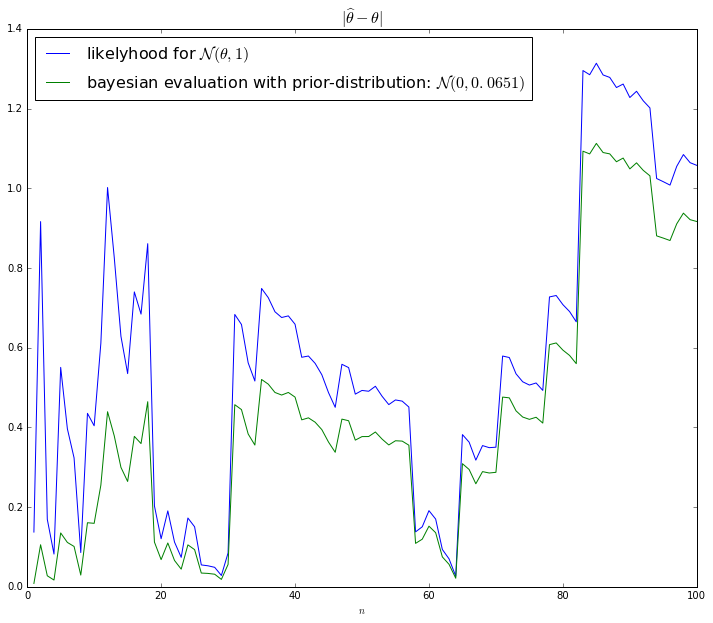

In [37]:
bayes_label = 'bayesian evaluation with prior-distribution: '\
              + r'$\mathcal{N}(0,' + str(round(sigm2,4)) + r')$'
likelyhood_label = r'likelyhood for $\mathcal{N}(\theta,1)$'
plt.figure(figsize=(12,10))
plt.title(r'$|\widehat{\theta} - \theta|$', fontsize=16)
plt.xlabel(r'$n$')
plt.plot(n,likelyhood_mean_evl,label = likelyhood_label)
plt.plot(n,bayesian_mean_evl, label = bayes_label)
plt.legend(loc = 'best',fontsize=16)
plt.show()

По графику видно, что байесовская оценка немного лучше оценки максимального правдоподобия, но ни одна из оценок не сходится.